### Student Information
Name:Sibongakonke Zungu

Student ID:108065432

GitHub ID:Sibonele

Kaggle name: Sibongakonke Zungu

Kaggle private scoreboard snapshot:



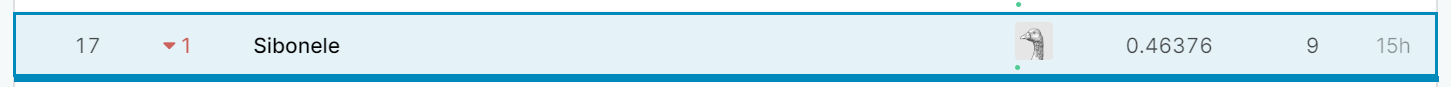

[Snapshot](img/pic0.png)
https://www.kaggle.com/c/dm19-lab2-kaggle-competition-2/leaderboard


### Report

# Steps taken

# Data Preprocessing

Libraries importating
Data source
Data importing
Normalization of json file
Renaming column headers

# Feature Engineering
 * Training set
 * Test set
Text tokenization 
 * from nltk.tokenize import TweetTokenizer
 I used this tokenizer as I am working with tweets and tweetTokenizer deals with tweets very well
 
Vectorizer
 * from sklearn.feature_extraction.text import CountVectorizer
 * from sklearn.feature_extraction.text import TfidfVectorizer
 
 
# Model training
Logistic Regresion.
 * makes use of the log function as it makes use of the several predcitorcs which are readily available, thus for the emotion prediction we ecpected 
 
# Saving of results
 * saved the result in a csvfile (to.csv)
 * Opened the file to create headers
 * Created and ordered file
 
# Competion CSV file submissions
 * 9 Submissions we're made
 
# Discussion and Conclusion

 

# Libraries importating

In [2]:
import pandas as pd
import nltk 
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


# Data source

Data from the tweets are provided as a json file and test and two csv files which contain Data Identification and emotions. This data is from the Data mining class. 

# Data importing

In [3]:
import pandas as pd
import sys
import json
from pandas.io.json import json_normalize

file = open("../input//dm19-lab2-nthu/tweets_DM.json", 'r', encoding='utf-8')
data = []
for line in file.readlines():
    dic = json.loads(line)

    data.append(dic)

data_id = pd.read_csv("../input/dm19-lab2-nthu/data_identification.csv" ,sep=",")
emotion = pd.read_csv("../input/dm19-lab2-nthu/emotion.csv", sep=",")


In [4]:
#Normalization of json file and changing of columns
tweets_df = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
tweets_df=tweets_df.rename({'_score': 'score','_index': 'inde','_crawldate': 'date','_type': 'type'
                           ,'_source.tweet.hashtags': 'hashtags','_source.tweet.tweet_id': 'tweet_id'
                           , '_source.tweet.text': 'text'}, axis=1)
tweets_df[:5]

,score,inde,date,type,hashtags,tweet_id,text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [5]:
#Creating one table from the json file containting tweets and merging it with  csv file data identification
merged_df = pd.merge(tweets_df, data_id, on="tweet_id")
merged_df.head()

,score,inde,date,type,hashtags,tweet_id,text,identification
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test


In [6]:
merged_df.shape

(1867535, 8)

In [7]:
#creating the training and test set
train_df=merged_df[merged_df["identification"] == "train"]
test_df=merged_df[merged_df["identification"] == "test"]

#add the emotion column
train_df=pd.merge(train_df,emotion, on="tweet_id")
test_df["emotion"]=""

#dropping identification tags
train_df.drop(columns=["identification"],inplace=True)
test_df.drop(columns=["identification"],inplace=True)

#using tweet_id as the index
train_df.set_index("tweet_id",inplace=True)
test_df.set_index("tweet_id",inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
#saving the df files to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [9]:
#loading the pickle file
train_df = pd.read_pickle("/kaggle/working/train_df.pkl")
test_df = pd.read_pickle("/kaggle/working/test_df.pkl")

In [10]:
from nltk.tokenize import TweetTokenizer
token = TweetTokenizer()

In [11]:
#To make sure that the name of the user is left out, it does not become part of the tokenized sentence
token = TweetTokenizer(strip_handles=True, reduce_len=True) 
x = '@wade: Confident of your obedience, keep pushing!!😂'
token.tokenize(x)

[':',
 'Confident',
 'of',
 'your',
 'obedience',
 ',',
 'keep',
 'pushing',
 '!',
 '!',
 '😂']

# Tokenization 

Taking max features of 90000 and removing stopwords which are in English

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


token = TweetTokenizer(preserve_case=False)
tfidf = TfidfVectorizer(max_features=90000, stop_words='english',
                                     tokenizer=token.tokenize)

#fitting
tfidf.fit(train_df['text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=90000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7fb6df6cb080>>,
                use_idf=True, vocabulary=None)

In [13]:
# transforming training sets
X_train = tfidf.transform(train_df['text'])
X_train.shape

(1455563, 90000)

In [14]:
# transforming testing sets
X_test = tfidf.transform(test_df['text'])
X_test.shape

(411972, 90000)

In [15]:
# set pointers
y_train = train_df['emotion']
y_test = test_df['emotion']

In [16]:
## build DecisionTree model
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'trust', 'sadness', 'anticipation', 'sadness', 'joy',
       'anticipation', 'surprise', 'sadness', 'anger'], dtype=object)

In [17]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.0


In [18]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

                   0.00      0.00      0.00  411972.0
       anger       0.00      0.00      0.00       0.0
anticipation       0.00      0.00      0.00       0.0
     disgust       0.00      0.00      0.00       0.0
        fear       0.00      0.00      0.00       0.0
         joy       0.00      0.00      0.00       0.0
     sadness       0.00      0.00      0.00       0.0
    surprise       0.00      0.00      0.00       0.0
       trust       0.00      0.00      0.00       0.0

    accuracy                           0.00  411972.0
   macro avg       0.00      0.00      0.00  411972.0
weighted avg       0.00      0.00      0.00  411972.0



In [19]:
y_test.shape

(411972,)

In [20]:
logreg = LogisticRegression(C=10,n_jobs=-1,max_iter=2000)


In [21]:
logreg.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
logreg_pred_result = logreg.predict(X_test)
logreg_pred_result.shape

(411972,)

In [23]:
logreg_pred_result

array(['anticipation', 'anticipation', 'joy', ..., 'anticipation', 'joy',
       'sadness'], dtype=object)

Using .to_csv to save file

In [24]:
# saving the result
test_df['emotion']=logreg_pred_result
test_df.index.rename('id',inplace=True)
test_df.emotion.columns=['emotion']
test_df.emotion.to_csv('submission002.csv',header = False)

In [25]:
# Creating column headers id and emotion 
sub22 = pd.read_csv("/kaggle/working/submission002.csv",names=['id', 'emotion'],index_col = False )
sub22.shape

(411972, 2)

In [26]:
#result after column header creation
sub22

,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,joy
3,0x2939d5,joy
4,0x26289a,anticipation
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,anticipation
411970,0x29d0cb,joy


In [27]:
sub22.to_csv('submission002.csv', index = False)

# Discussion and conclusion
 The more the max_features, the higher the accuraccy
 Logistic Regression was used because it does not take to long and I wanted to try a different modeling method than I am used     too
 Tried using descion trees and checkinng model accuracy but did not yield good results as it took hours to train and eventually had to stop the kernel. This lab exercise helped give me better understanding of what was being done in class and how we could apply the different methods for Natural Language processing.